## Task 2: Prediction using Unsupervised ML


From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### K-Means Clustering

### AUTHOR- Prabhjot Singh Bedi

#### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Import the  iris dataset

In [2]:
data=pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##### Map the dummy variable

In [3]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
data['Species']=data['Species'].map({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})

#### Plot the data

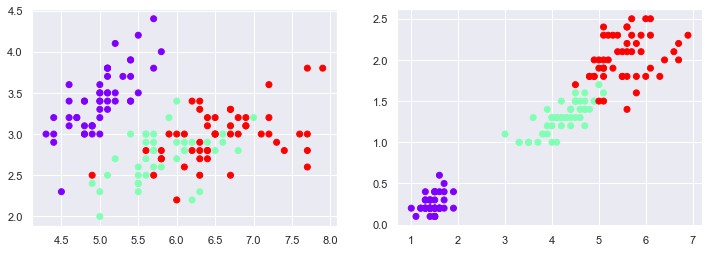

In [5]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))
ax1.scatter(data['SepalLengthCm'], data['SepalWidthCm'], c= data['Species'], cmap = 'rainbow')
ax2.scatter(data['PetalLengthCm'], data['PetalWidthCm'], c= data['Species'], cmap = 'rainbow')

#### To find optimum number of clusters for the given dataset

In [6]:
from sklearn.cluster import KMeans
x=data.iloc[:,1:5].values
wcss=[]
for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

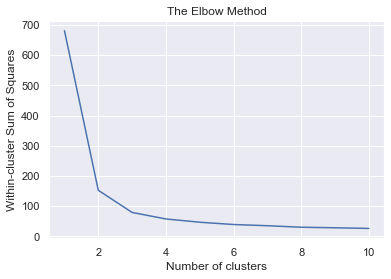

In [7]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

In [8]:
kmeans = KMeans(3)
y_kmeans = kmeans.fit_predict(x)
df=data.iloc[:,1:5]
df['Clusters']=y_kmeans
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


#### Visualizing the  first two columns

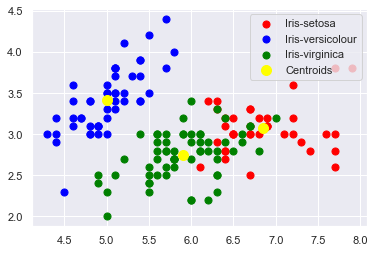

In [9]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 50, c= 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 50, c= 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], 
            s = 50, c= 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()